# BLWF Indicators coecifients

Make sure that the blue water footprint indicators coeficients that we are ingesting into the platform are correctly generated. Previous report here: 

In [1]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install openpyxl --q

In [3]:
!ls ../../datasets/raw/TRASE_data/WFN/

bwfp_indicator_coefficients.csv  Report48-Appendix-V_clean.xlsx
bwfp_updates_csv		 Report50_Appendix
gadm_admin_regions.csv		 Report50_Appendix.zip
Report47-Appendix		 updated_blwf_v3.csv
Report47-Appendix.zip


In [5]:
# open file with blue water footprint for crop products (m3/t)
file_path = "../../datasets/raw/TRASE_data/WFN/Report47-Appendix/Report47-Appendix-II_clean.xlsx"
df_c = pd.read_excel(file_path, sheet_name="App-II-WF_perTon")
df_c.head()

,HS_code,HS_code_simpl,Parent_code,Product description (HS),BLWF,Global,Badakhshan,Badghis,Baghlan,Bamian,...,Mandiana,Nzerekore,Siguiri,Fria,Gaoual,Kankan.1,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,100110 / 100190,1001,10,"Wheat (Durum wheat, Wheat nes and meslin)",Blue,342.455127,31.721746,175.864238,89.244217,102.317931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110100,1101,11,Wheat or meslin flour,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110100a,1101,11,Wheat bread,Blue,301.327361,27.912066,154.743506,78.526272,90.029875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110100b,1101,11,Dry pasta,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110311,1103,11,Wheat groats and meal,Blue,381.662328,35.353524,195.998685,99.461661,114.032166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# open file with bluw eater footprint for animal products (m3/t)
file_path = "../../datasets/raw/TRASE_data/WFN/Report48-Appendix-V_clean.xlsx"
df_a = pd.read_excel(file_path, sheet_name="App-V_WF_HS_SITC")
df_a.head()

,HS_code,HS_code_simpl,Parent_code,Product description (HS),BLWF,Global,Afghanistan,Albania,Algeria,Angola,...,Industrial.196,Serbia and Montenegro.1,Grazing.197,Mixed.197,Industrial.197,Zambia,Grazing.198,Mixed.198,Industrial.198,0
0,10111,101,1,"Horses, live pure-bred breeding",Blue,2461.907249,15447.208993,2001.292947,5002.937036,6485.910237,...,0.000000,557.882014,8395.663132,0.000000,0.000000,8395.663132,3422.987187,0.000000,0.000000,3422.987187
1,10119,101,1,"Horses, live except pure-bred breeding",Blue,2461.907249,15447.208993,2001.292947,5002.937036,6485.910237,...,0.000000,557.882014,8395.663132,0.000000,0.000000,8395.663132,3422.987187,0.000000,0.000000,3422.987187
2,10120,101,1,"Asses, mules and hinnies, live",Blue,2461.907249,15447.208993,2001.292947,5002.937036,6485.910237,...,0.000000,557.882014,8395.663132,0.000000,0.000000,8395.663132,3422.987187,0.000000,0.000000,3422.987187
3,10210,102,1,"Bovine, live pure-bred breeding",Blue,255.886951,3453.537496,254.637934,389.224871,79.970464,...,91.187883,81.769132,87.044926,113.277411,83.525313,96.363228,70.010537,82.819435,101.602383,82.194214
4,10290,102,1,"Bovine, live except pure-bred breeding",Blue,255.886951,3453.537496,254.637934,389.224871,79.970464,...,91.187883,81.769132,87.044926,113.277411,83.525313,96.363228,70.010537,82.819435,101.602383,82.194214


In [7]:
# try to remove the Grazing and Mixed columns from the animal dataframe
word1 = "Mixed"
word2 = "Grazing"
word3 = "Industrial"


# check if the column index contains missing values
has_missing_values = df_a.columns.get_level_values(0).isna().any()

if has_missing_values:
    # replace missing values with an empty string
    df_a.columns = d_a.columns.fillna("")

# apply a boolean mask to remove columns with specific worlds in the header
df_a = df_a.drop(
    columns=df_a.columns[
        df_a.columns.get_level_values(0).str.contains(word1, na=False)
        | df_a.columns.get_level_values(0).str.contains(word2, na=False)
        | df_a.columns.get_level_values(0).str.contains(word3, na=False)
    ]
)
df_a.head()

,HS_code,HS_code_simpl,Parent_code,Product description (HS),BLWF,Global,Afghanistan,Albania,Algeria,Angola,...,United States of America,Uzbekistan,Vanuatu,"Venezuela, Boliv Rep of",Viet Nam,Wallis and Futuna Is,Yemen,Serbia and Montenegro.1,Zambia,0
0,10111,101,1,"Horses, live pure-bred breeding",Blue,2461.907249,15447.208993,2001.292947,5002.937036,6485.910237,...,2176.616369,2081.565157,1126.632535,1592.319477,958.245771,1125.329484,4355.183923,557.882014,8395.663132,3422.987187
1,10119,101,1,"Horses, live except pure-bred breeding",Blue,2461.907249,15447.208993,2001.292947,5002.937036,6485.910237,...,2176.616369,2081.565157,1126.632535,1592.319477,958.245771,1125.329484,4355.183923,557.882014,8395.663132,3422.987187
2,10120,101,1,"Asses, mules and hinnies, live",Blue,2461.907249,15447.208993,2001.292947,5002.937036,6485.910237,...,2176.616369,2081.565157,1126.632535,1592.319477,958.245771,1125.329484,4355.183923,557.882014,8395.663132,3422.987187
3,10210,102,1,"Bovine, live pure-bred breeding",Blue,255.886951,3453.537496,254.637934,389.224871,79.970464,...,246.330262,827.856372,51.317822,67.943504,90.873298,153.332938,888.522022,81.769132,96.363228,82.194214
4,10290,102,1,"Bovine, live except pure-bred breeding",Blue,255.886951,3453.537496,254.637934,389.224871,79.970464,...,246.330262,827.856372,51.317822,67.943504,90.873298,153.332938,888.522022,81.769132,96.363228,82.194214


In [8]:
# Remove the unamed from the crop dataframe
word = "Unnamed"

# check if the column index contains missing values
has_missing_values = df_c.columns.get_level_values(0).isna().any()

if has_missing_values:
    # replace missing values with an empty string
    df_c.columns = df_c.columns.fillna("")

# apply a boolean mask to remove columns with specific worlds in the header
df_c = df_c.drop(
    columns=df_c.columns[df_c.columns.get_level_values(0).str.contains(word, na=False)]
)
df_c.head()

,HS_code,HS_code_simpl,Parent_code,Product description (HS),BLWF,Global,Badakhshan,Badghis,Baghlan,Bamian,...,Koubia,Labe,Lelouma,Lola,Mandiana,Nzerekore,Siguiri,Fria,Gaoual,Kankan.1
0,100110 / 100190,1001,10,"Wheat (Durum wheat, Wheat nes and meslin)",Blue,342.455127,31.721746,175.864238,89.244217,102.317931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110100,1101,11,Wheat or meslin flour,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110100a,1101,11,Wheat bread,Blue,301.327361,27.912066,154.743506,78.526272,90.029875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110100b,1101,11,Dry pasta,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110311,1103,11,Wheat groats and meal,Blue,381.662328,35.353524,195.998685,99.461661,114.032166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Clean both dataset for merging everyhting into a single one (animals + crop products)
# I am assuming that the country names would be the sames for both datasets as they are sharing the same source
# i have double checked on the excel spreadhseets and the country and administrative names are gadm complient.
# however, there are some names that don't have any gadm match

concat_df = pd.concat([df_c, df_a])
concat_df.head()

,HS_code,HS_code_simpl,Parent_code,Product description (HS),BLWF,Global,Badakhshan,Badghis,Baghlan,Bamian,...,United States of America,Uzbekistan,Vanuatu,"Venezuela, Boliv Rep of",Viet Nam,Wallis and Futuna Is,Yemen,Serbia and Montenegro.1,Zambia,0
0,100110 / 100190,1001,10,"Wheat (Durum wheat, Wheat nes and meslin)",Blue,342.455127,31.721746,175.864238,89.244217,102.317931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110100,1101,11,Wheat or meslin flour,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110100a,1101,11,Wheat bread,Blue,301.327361,27.912066,154.743506,78.526272,90.029875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110100b,1101,11,Dry pasta,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110311,1103,11,Wheat groats and meal,Blue,381.662328,35.353524,195.998685,99.461661,114.032166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
concat_df[concat_df["Parent_code"] == 18]

,HS_code,HS_code_simpl,Parent_code,Product description (HS),BLWF,Global,Badakhshan,Badghis,Baghlan,Bamian,...,United States of America,Uzbekistan,Vanuatu,"Venezuela, Boliv Rep of",Viet Nam,Wallis and Futuna Is,Yemen,Serbia and Montenegro.1,Zambia,0
298,180100,1801,18,"Cocoa beans, whole or broken, raw or roasted",Blue,3.972254,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,180200,1802,18,"Cocoa shells, husks, skins and other cocoa waste",Blue,0.535550,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,180310,1803,18,Cocoa paste not defatted,Blue,4.831430,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,180320,1803,18,Cocoa paste wholly or partly defatted,Blue,4.831430,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,180400,1804,18,"Cocoa butter, fat and oil",Blue,6.764973,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,180500,1805,18,"Cocoa powder, not containing added sugar or ot...",Blue,3.116779,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,180500a,1805,18,Chocolate,Blue,197.920323,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,180610,1806,18,"Cocoa powder, containing added sugar or other ...",Blue,3.116779,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# open already prepared indicator coeficients csv
df_cf = pd.read_csv("../../datasets/raw/TRASE_data/WFN/bwfp_indicator_coefficients.csv")
df_cf.head()

,name,hs_2017_code,country,value,year
0,01 Animals; live,1,Global,3349.0,2005
1,"01.01 Horses, asses, mules and hinnies; live",101,Global,2462.0,2005
2,01.02 Bovine animals; live,102,Global,256.0,2005
3,01.03 Swine; live,103,Global,276.0,2005
4,01.04 Sheep and goats; live,104,Global,191.0,2005


### Let's start just by fixing the country and global value for crop commodities

The current csv just has the country an global values. Once this is fixed we can move to adding the different admin regions

In [12]:
%%time
updated_value = []
for i, row in df_cf.iterrows():
    hs_code = row["hs_2017_code"]
    country = row["country"]
    # print(f'Searching blwf value for hscode {hs_code} and location equial to {country}...')
    try:
        concat_df_ = concat_df[concat_df["HS_code_simpl"] == hs_code]
        blwf_value = concat_df_[f"{country}"].mean()
        # we don't do the sum of all the childs as the childs are sometimes the same, so for getting the parent we perform just the average
        # blwf_value = concat_df_[f'{country}'].sum()
    except:
        blwf_value = None
    updated_value.append(blwf_value)

df_cf["Updated_value"] = updated_value


df_cf.head()

CPU times: user 34.9 s, sys: 19.5 ms, total: 34.9 s
Wall time: 34.9 s


,name,hs_2017_code,country,value,year,Updated_value
0,01 Animals; live,1,Global,3349.0,2005,NaN
1,"01.01 Horses, asses, mules and hinnies; live",101,Global,2462.0,2005,2461.907249
2,01.02 Bovine animals; live,102,Global,256.0,2005,255.886951
3,01.03 Swine; live,103,Global,276.0,2005,276.341756
4,01.04 Sheep and goats; live,104,Global,191.0,2005,190.990825


In [13]:
# get the parent code so we can sum all the childrens
parent_df = concat_df[["HS_code_simpl", "Parent_code"]]
parent_df = parent_df.rename(columns={"HS_code_simpl": "hs_2017_code"})
parent_df = parent_df.drop_duplicates()
parent_df.head()

,hs_2017_code,Parent_code
0,1001,10
1,1101,11
4,1103,11
6,1108,11
7,1109,11


In [14]:
# merge the parent values with the blwf dataframe so we know the childrens that we have to sum
merged_df = df_cf.merge(parent_df, on="hs_2017_code", how="left")
merged_df.head()

,name,hs_2017_code,country,value,year,Updated_value,Parent_code
0,01 Animals; live,1,Global,3349.0,2005,NaN,NaN
1,"01.01 Horses, asses, mules and hinnies; live",101,Global,2462.0,2005,2461.907249,1.0
2,01.02 Bovine animals; live,102,Global,256.0,2005,255.886951,1.0
3,01.03 Swine; live,103,Global,276.0,2005,276.341756,1.0
4,01.04 Sheep and goats; live,104,Global,191.0,2005,190.990825,1.0


In [15]:
# Sum values based on another column
sum_df = merged_df.groupby(["Parent_code", "country"])["Updated_value"].sum()
sum_df

Parent_code  country          
1.0          Afghanistan          23442.886662
             Albania               5004.585624
             Algeria               6625.555483
             American Samoa           0.000000
             Angola                6899.035210
                                      ...     
53.0         Wallis and Futuna        0.000000
             Western Sahara           0.000000
             Yemen                    0.000000
             Zambia                   0.000000
             Zimbabwe                 0.000000
Name: Updated_value, Length: 4554, dtype: float64

In [16]:
total_values = pd.DataFrame(sum_df)
total_values = total_values.reset_index()
total_values

,Parent_code,country,Updated_value
0,1.0,Afghanistan,23442.886662
1,1.0,Albania,5004.585624
2,1.0,Algeria,6625.555483
3,1.0,American Samoa,0.000000
4,1.0,Angola,6899.035210
...,...,...,...
4549,53.0,Wallis and Futuna,0.000000
4550,53.0,Western Sahara,0.000000
4551,53.0,Yemen,0.000000
4552,53.0,Zambia,0.000000


In [17]:
### search for the parent value and add the total

for i, row in df_cf.iterrows():
    hs_code = row["hs_2017_code"]
    country = row["country"]
    # is_null = str(row['Updated_value'])
    if len(str(hs_code)) < 3:
        # get the total value for the country and hscode
        filtered_df = total_values[
            (total_values["country"] == country) & (total_values["Parent_code"] == hs_code)
        ]
        try:
            parent_value = list(filtered_df["Updated_value"])[0]
        except:
            print(f"No value for {hs_code} and {country}")
            print(list(filtered_df["Updated_value"]))
            parent_value = None
        df_cf.loc[i, "Updated_value"] = parent_value

df_cf.head()

No value for 6 and Global
[]
No value for 19 and Global
[]
No value for 43 and Global
[]
No value for 44 and Global
[]
No value for 45 and Global
[]
No value for 47 and Global
[]
No value for 50 and Global
[]
No value for 51 and Global
[]
No value for 6 and Afghanistan
[]
No value for 19 and Afghanistan
[]
No value for 43 and Afghanistan
[]
No value for 44 and Afghanistan
[]
No value for 45 and Afghanistan
[]
No value for 47 and Afghanistan
[]
No value for 50 and Afghanistan
[]
No value for 51 and Afghanistan
[]
No value for 6 and Albania
[]
No value for 19 and Albania
[]
No value for 43 and Albania
[]
No value for 44 and Albania
[]
No value for 45 and Albania
[]
No value for 47 and Albania
[]
No value for 50 and Albania
[]
No value for 51 and Albania
[]
No value for 6 and Algeria
[]
No value for 19 and Algeria
[]
No value for 43 and Algeria
[]
No value for 44 and Algeria
[]
No value for 45 and Algeria
[]
No value for 47 and Algeria
[]
No value for 50 and Algeria
[]
No value for 51 and

No value for 6 and Cameroon
[]
No value for 19 and Cameroon
[]
No value for 43 and Cameroon
[]
No value for 44 and Cameroon
[]
No value for 45 and Cameroon
[]
No value for 47 and Cameroon
[]
No value for 50 and Cameroon
[]
No value for 51 and Cameroon
[]
No value for 6 and Canada
[]
No value for 19 and Canada
[]
No value for 43 and Canada
[]
No value for 44 and Canada
[]
No value for 45 and Canada
[]
No value for 47 and Canada
[]
No value for 50 and Canada
[]
No value for 51 and Canada
[]
No value for 6 and Cape Verde
[]
No value for 19 and Cape Verde
[]
No value for 43 and Cape Verde
[]
No value for 44 and Cape Verde
[]
No value for 45 and Cape Verde
[]
No value for 47 and Cape Verde
[]
No value for 50 and Cape Verde
[]
No value for 51 and Cape Verde
[]
No value for 6 and Cayman Islands
[]
No value for 19 and Cayman Islands
[]
No value for 43 and Cayman Islands
[]
No value for 44 and Cayman Islands
[]
No value for 45 and Cayman Islands
[]
No value for 47 and Cayman Islands
[]
No value

[]
No value for 50 and Finland
[]
No value for 51 and Finland
[]
No value for 6 and France
[]
No value for 19 and France
[]
No value for 43 and France
[]
No value for 44 and France
[]
No value for 45 and France
[]
No value for 47 and France
[]
No value for 50 and France
[]
No value for 51 and France
[]
No value for 6 and French Guiana
[]
No value for 19 and French Guiana
[]
No value for 43 and French Guiana
[]
No value for 44 and French Guiana
[]
No value for 45 and French Guiana
[]
No value for 47 and French Guiana
[]
No value for 50 and French Guiana
[]
No value for 51 and French Guiana
[]
No value for 6 and French Polynesia
[]
No value for 19 and French Polynesia
[]
No value for 43 and French Polynesia
[]
No value for 44 and French Polynesia
[]
No value for 45 and French Polynesia
[]
No value for 47 and French Polynesia
[]
No value for 50 and French Polynesia
[]
No value for 51 and French Polynesia
[]
No value for 6 and Gabon
[]
No value for 19 and Gabon
[]
No value for 43 and Gabon

No value for 43 and North Korea
[]
No value for 44 and North Korea
[]
No value for 45 and North Korea
[]
No value for 47 and North Korea
[]
No value for 50 and North Korea
[]
No value for 51 and North Korea
[]
No value for 6 and South Korea
[]
No value for 19 and South Korea
[]
No value for 43 and South Korea
[]
No value for 44 and South Korea
[]
No value for 45 and South Korea
[]
No value for 47 and South Korea
[]
No value for 50 and South Korea
[]
No value for 51 and South Korea
[]
No value for 6 and Kuwait
[]
No value for 19 and Kuwait
[]
No value for 43 and Kuwait
[]
No value for 44 and Kuwait
[]
No value for 45 and Kuwait
[]
No value for 47 and Kuwait
[]
No value for 50 and Kuwait
[]
No value for 51 and Kuwait
[]
No value for 6 and Kyrgyzstan
[]
No value for 19 and Kyrgyzstan
[]
No value for 43 and Kyrgyzstan
[]
No value for 44 and Kyrgyzstan
[]
No value for 45 and Kyrgyzstan
[]
No value for 47 and Kyrgyzstan
[]
No value for 50 and Kyrgyzstan
[]
No value for 51 and Kyrgyzstan
[]
N

No value for 19 and Netherlands
[]
No value for 43 and Netherlands
[]
No value for 44 and Netherlands
[]
No value for 45 and Netherlands
[]
No value for 47 and Netherlands
[]
No value for 50 and Netherlands
[]
No value for 51 and Netherlands
[]
No value for 6 and New Caledonia
[]
No value for 19 and New Caledonia
[]
No value for 43 and New Caledonia
[]
No value for 44 and New Caledonia
[]
No value for 45 and New Caledonia
[]
No value for 47 and New Caledonia
[]
No value for 50 and New Caledonia
[]
No value for 51 and New Caledonia
[]
No value for 6 and New Zealand
[]
No value for 19 and New Zealand
[]
No value for 43 and New Zealand
[]
No value for 44 and New Zealand
[]
No value for 45 and New Zealand
[]
No value for 47 and New Zealand
[]
No value for 50 and New Zealand
[]
No value for 51 and New Zealand
[]
No value for 6 and Nicaragua
[]
No value for 19 and Nicaragua
[]
No value for 43 and Nicaragua
[]
No value for 44 and Nicaragua
[]
No value for 45 and Nicaragua
[]
No value for 47 a

No value for 19 and Sierra Leone
[]
No value for 43 and Sierra Leone
[]
No value for 44 and Sierra Leone
[]
No value for 45 and Sierra Leone
[]
No value for 47 and Sierra Leone
[]
No value for 50 and Sierra Leone
[]
No value for 51 and Sierra Leone
[]
No value for 6 and Singapore
[]
No value for 19 and Singapore
[]
No value for 43 and Singapore
[]
No value for 44 and Singapore
[]
No value for 45 and Singapore
[]
No value for 47 and Singapore
[]
No value for 50 and Singapore
[]
No value for 51 and Singapore
[]
No value for 6 and Slovakia
[]
No value for 19 and Slovakia
[]
No value for 43 and Slovakia
[]
No value for 44 and Slovakia
[]
No value for 45 and Slovakia
[]
No value for 47 and Slovakia
[]
No value for 50 and Slovakia
[]
No value for 51 and Slovakia
[]
No value for 6 and Slovenia
[]
No value for 19 and Slovenia
[]
No value for 43 and Slovenia
[]
No value for 44 and Slovenia
[]
No value for 45 and Slovenia
[]
No value for 47 and Slovenia
[]
No value for 50 and Slovenia
[]
No valu

No value for 51 and Vanuatu
[]
No value for 6 and Venezuela
[]
No value for 19 and Venezuela
[]
No value for 43 and Venezuela
[]
No value for 44 and Venezuela
[]
No value for 45 and Venezuela
[]
No value for 47 and Venezuela
[]
No value for 50 and Venezuela
[]
No value for 51 and Venezuela
[]
No value for 6 and Vietnam
[]
No value for 19 and Vietnam
[]
No value for 43 and Vietnam
[]
No value for 44 and Vietnam
[]
No value for 45 and Vietnam
[]
No value for 47 and Vietnam
[]
No value for 50 and Vietnam
[]
No value for 51 and Vietnam
[]
No value for 6 and Wallis and Futuna
[]
No value for 19 and Wallis and Futuna
[]
No value for 43 and Wallis and Futuna
[]
No value for 44 and Wallis and Futuna
[]
No value for 45 and Wallis and Futuna
[]
No value for 47 and Wallis and Futuna
[]
No value for 50 and Wallis and Futuna
[]
No value for 51 and Wallis and Futuna
[]
No value for 6 and Western Sahara
[]
No value for 19 and Western Sahara
[]
No value for 43 and Western Sahara
[]
No value for 44 and

,name,hs_2017_code,country,value,year,Updated_value
0,01 Animals; live,1,Global,3349.0,2005,3349.210720
1,"01.01 Horses, asses, mules and hinnies; live",101,Global,2462.0,2005,2461.907249
2,01.02 Bovine animals; live,102,Global,256.0,2005,255.886951
3,01.03 Swine; live,103,Global,276.0,2005,276.341756
4,01.04 Sheep and goats; live,104,Global,191.0,2005,190.990825


In [18]:
df_cf.to_csv("../../datasets/raw/TRASE_data/WFN/updated_blwf_v4.csv")

In [19]:
# explore the differentce between the old value and the updated one
df_cf["difference"] = df_cf["value"] - df_cf["Updated_value"]
df_cf.head()

,name,hs_2017_code,country,value,year,Updated_value,difference
0,01 Animals; live,1,Global,3349.0,2005,3349.210720,-0.210720
1,"01.01 Horses, asses, mules and hinnies; live",101,Global,2462.0,2005,2461.907249,0.092751
2,01.02 Bovine animals; live,102,Global,256.0,2005,255.886951,0.113049
3,01.03 Swine; live,103,Global,276.0,2005,276.341756,-0.341756
4,01.04 Sheep and goats; live,104,Global,191.0,2005,190.990825,0.009175


In [20]:
error_greater_than_1 = df_cf[df_cf["difference"] > 1]
error_greater_than_1.head()

,name,hs_2017_code,country,value,year,Updated_value,difference
30,"05.02 Pigs', hogs' or boars' bristles and hair...",502,Global,3155.0,2005,1039.909557,2115.090443
43,07 Vegetables and certain roots and tubers; ed...,7,Global,3822.0,2005,1250.432093,2571.567907
49,"07.06 Carrots, turnips, salad beetroot, salsif...",706,Global,45.0,2005,21.723058,23.276942
52,"07.09 Vegetables; n.e.c. in chapter 07, fresh ...",709,Global,408.0,2005,107.476056,300.523944
54,07.11 Vegetables provisionally preserved; (e.g...,711,Global,1725.0,2005,54.305583,1670.694417


In [21]:
error_greater_than_1[error_greater_than_1["hs_2017_code"] == 9]

,name,hs_2017_code,country,value,year,Updated_value,difference


In [373]:
error_greater_than_1[
    (error_greater_than_1["Updated_value"] > 3349) & (error_greater_than_1["Updated_value"] < 3350)
]

,name,hs_2017_code,country,value,year,Updated_value,difference


In [22]:
len(error_greater_than_1) / len(df_cf)

0.01724192728197305

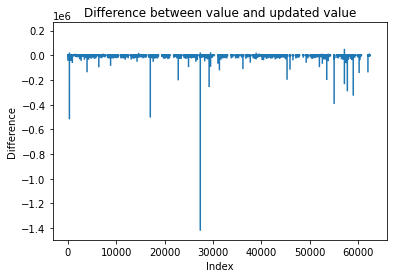

In [23]:
# Plot the difference column
plt.plot(df_cf["difference"])
plt.xlabel("Index")
plt.ylabel("Difference")
plt.title("Difference between value and updated value")
plt.show()

# Prepare data to be ingested

Update the previos value with the new one to update the values that are slightly different

In [24]:
df_cf_clean = df_cf[["name", "hs_2017_code", "country", "Updated_value"]]
df_cf_clean = df_cf_clean.rename(columns={"Updated_value": "value"})
df_cf_clean.head()

,name,hs_2017_code,country,value
0,01 Animals; live,1,Global,3349.210720
1,"01.01 Horses, asses, mules and hinnies; live",101,Global,2461.907249
2,01.02 Bovine animals; live,102,Global,255.886951
3,01.03 Swine; live,103,Global,276.341756
4,01.04 Sheep and goats; live,104,Global,190.990825


In [25]:
## we have some issue during the ingestion as the hscodes for those starting with 0
# (e.g.Animals;live 01 ) are ingested in the csv as 1 (instead of 01) and therefore, the match in the
# database side does not work (the material ingested is 01 and not 1)
# We need to include that zero in the HSCODES

new_hs_code_str = []
for i, row in df_cf_clean.iterrows():
    hs_code = row["hs_2017_code"]

    if len(str(hs_code)) == 1 or len(str(hs_code)) == 3:
        new_hs_code = "0" + str(hs_code)
    else:
        new_hs_code = str(hs_code)

    new_hs_code_str.append(new_hs_code)


df_cf_clean["hs_code_updated_str"] = new_hs_code_str

In [26]:
# update csv with str hscode to improve the match
df_cf_clean_v2 = df_cf_clean[["name", "hs_code_updated_str", "country", "value"]]
# rename the column
df_cf_clean_v2 = df_cf_clean_v2.rename(columns={"hs_code_updated_str": "hs_2017_code"})
df_cf_clean_v2.head()

,name,hs_2017_code,country,value
0,01 Animals; live,01,Global,3349.210720
1,"01.01 Horses, asses, mules and hinnies; live",0101,Global,2461.907249
2,01.02 Bovine animals; live,0102,Global,255.886951
3,01.03 Swine; live,0103,Global,276.341756
4,01.04 Sheep and goats; live,0104,Global,190.990825


In [27]:
# export and test ingestion
df_cf_clean_v2.to_csv(
    "../../datasets/raw/TRASE_data/WFN/bwfp_indicator_coefficients_updated_v4.csv"
)

In [28]:
dtype_mapping = {"hs_2017_code": str}
file = "../../datasets/raw/TRASE_data/WFN/bwfp_indicator_coefficients_updated_v4.csv"
df = pd.read_csv(file, dtype=dtype_mapping)
df.head()

,Unnamed: 0,name,hs_2017_code,country,value
0,0,01 Animals; live,01,Global,3349.210720
1,1,"01.01 Horses, asses, mules and hinnies; live",0101,Global,2461.907249
2,2,01.02 Bovine animals; live,0102,Global,255.886951
3,3,01.03 Swine; live,0103,Global,276.341756
4,4,01.04 Sheep and goats; live,0104,Global,190.990825


## Include the different administrative regions that are missing on the initial file

The initial csv does just include the country and global information. However, the original source data includes different levels of admin regions (admin region 0 and 1). As part of this section, I will include all the admin regions 1 that the original data source contains to expand the blwf csv.

In [29]:
# get the list of countries that have been included in the original blwf dataframe
original_admins = set(list(df["country"]))

In [30]:
# get the list of all the countries that exist in the original dataframe
all_admins = set(list(df_c[5:]))

In [31]:
# identify the ones from all admins that havent been include on the blwf csv and that need to be included
admin_regions_not_in_file = all_admins - original_admins

In [32]:
# create a list of dataframes with the new admin regions to contact
list_df_ = []
sorted_list = sorted(admin_regions_not_in_file)
for index, admin in enumerate(sorted_list):
    df_global = df_cf_clean_v2[df_cf_clean_v2["country"] == "Global"]
    df_global["country"] = admin
    df_global["value"] = 0

    df_ = df_global

    list_df_.append(df_)

<ipython-input-32-c27272086341>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global['country']=admin
<ipython-input-32-c27272086341>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_global['value']=0


In [33]:
# concat the list of dataframes with the new admins
new_admins_df_ = pd.concat(list_df_)
new_admins_df_.head()

,name,hs_2017_code,country,value
0,01 Animals; live,01,Abengourou,0
1,"01.01 Horses, asses, mules and hinnies; live",0101,Abengourou,0
2,01.02 Bovine animals; live,0102,Abengourou,0
3,01.03 Swine; live,0103,Abengourou,0
4,01.04 Sheep and goats; live,0104,Abengourou,0


In [34]:
# add the leading 0 to the simplied hs code so we can work with the same hscode index
updated_hscode = []
for i, row in concat_df.iterrows():
    hs_code = str(row["HS_code_simpl"])
    if (len(hs_code)) == 1 or (len(hs_code) == 3):
        updated_hs_code = "0" + hs_code
    else:
        updated_hs_code = hs_code
    updated_hscode.append(updated_hs_code)
concat_df["updated_hscode"] = updated_hscode
concat_df.head()

,HS_code,HS_code_simpl,Parent_code,Product description (HS),BLWF,Global,Badakhshan,Badghis,Baghlan,Bamian,...,Uzbekistan,Vanuatu,"Venezuela, Boliv Rep of",Viet Nam,Wallis and Futuna Is,Yemen,Serbia and Montenegro.1,Zambia,0,updated_hscode
0,100110 / 100190,1001,10,"Wheat (Durum wheat, Wheat nes and meslin)",Blue,342.455127,31.721746,175.864238,89.244217,102.317931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001
1,110100,1101,11,Wheat or meslin flour,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101
2,110100a,1101,11,Wheat bread,Blue,301.327361,27.912066,154.743506,78.526272,90.029875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101
3,110100b,1101,11,Dry pasta,Blue,346.526466,32.098876,177.955031,90.305213,103.534356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101
4,110311,1103,11,Wheat groats and meal,Blue,381.662328,35.353524,195.998685,99.461661,114.032166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1103


In [35]:
%%time
# get the value for each admin region from the original file
updated_value = []
for i, row in new_admins_df_.iterrows():
    hs_code = row["hs_2017_code"]
    country = row["country"]
    try:
        concat_df_ = concat_df[concat_df["updated_hscode"] == hs_code]
        blwf_value = concat_df_[f"{country}"].mean()
    except:
        blwf_value = None
    updated_value.append(blwf_value)

new_admins_df_["value"] = updated_value
new_admins_df_.head()

CPU times: user 2min 41s, sys: 63.1 ms, total: 2min 42s
Wall time: 2min 41s


,name,hs_2017_code,country,value
0,01 Animals; live,01,Abengourou,NaN
1,"01.01 Horses, asses, mules and hinnies; live",0101,Abengourou,NaN
2,01.02 Bovine animals; live,0102,Abengourou,NaN
3,01.03 Swine; live,0103,Abengourou,NaN
4,01.04 Sheep and goats; live,0104,Abengourou,NaN


In [36]:
# double check with local file that the values are correct
new_admins_df_[
    (new_admins_df_["country"] == "Badakhshan") & (new_admins_df_["hs_2017_code"] == "0910")
]

,name,hs_2017_code,country,value
83,"09.10 Ginger, saffron, tumeric (curcuma), thym...",0910,Badakhshan,NaN


In [37]:
# add the parent code to the new admins dataframe so we can sum the childrens to get the parent value
new_admins_df_["Parent_code"] = [el[:2] for el in new_admins_df_["hs_2017_code"]]
new_admins_df_.head()

,name,hs_2017_code,country,value,Parent_code
0,01 Animals; live,01,Abengourou,NaN,01
1,"01.01 Horses, asses, mules and hinnies; live",0101,Abengourou,NaN,01
2,01.02 Bovine animals; live,0102,Abengourou,NaN,01
3,01.03 Swine; live,0103,Abengourou,NaN,01
4,01.04 Sheep and goats; live,0104,Abengourou,NaN,01


In [38]:
# double check that the parent values are correct
new_admins_df_[
    (new_admins_df_["Parent_code"] == "09") & (new_admins_df_["country"] == "Abengourou")
]

,name,hs_2017_code,country,value,Parent_code
73,"09 Coffee, tea, mate and spices",09,Abengourou,NaN,09
74,"09.01 Coffee, whether or not roasted or decaff...",0901,Abengourou,NaN,09
75,09.02 Tea,0902,Abengourou,NaN,09
76,09.03 Mate,0903,Abengourou,NaN,09
77,09.04 Pepper of the genus piper; dried or crus...,0904,Abengourou,96.740791,09
78,09.05 Vanilla,0905,Abengourou,NaN,09
79,09.06 Cinnamon and cinnamon-tree flowers,0906,Abengourou,NaN,09
80,"09.07 Cloves (whole fruit, cloves and stems)",0907,Abengourou,NaN,09
81,"09.08 Nutmeg, mace and cardamoms",0908,Abengourou,NaN,09
82,"09.09 Seeds of anise, badian, fennel, coriande...",0909,Abengourou,NaN,09


In [39]:
# group by country and parent code to get totals by parent
sum_df = new_admins_df_.groupby(["Parent_code", "country"])["value"].sum()
sum_df

Parent_code  country         
01           Abengourou           0.000000
             Abengourou.1         0.000000
             Abidjan              0.000000
             Abkhazia             0.000000
             Aboisso              0.000000
                                   ...    
53           Zamora-Chinchipe     0.000000
             Zhejiang            13.063465
             Zou                  0.000000
             Zoundweogo           0.000000
             Zuenoula             0.000000
Name: value, Length: 28350, dtype: float64

In [40]:
# create a dataframe with the parent values so we can join with the new admin areas
total_values = pd.DataFrame(sum_df)
total_values = total_values.reset_index()
total_values

,Parent_code,country,value
0,01,Abengourou,0.000000
1,01,Abengourou.1,0.000000
2,01,Abidjan,0.000000
3,01,Abkhazia,0.000000
4,01,Aboisso,0.000000
...,...,...,...
28345,53,Zamora-Chinchipe,0.000000
28346,53,Zhejiang,13.063465
28347,53,Zou,0.000000
28348,53,Zoundweogo,0.000000


In [41]:
# double check the value
total_values[(total_values["country"] == "Abengourou") & (total_values["Parent_code"] == "09")]

,Parent_code,country,value
6615,09,Abengourou,128.706575


In [42]:
new_admins_df_.dtypes

name             object
hs_2017_code     object
country          object
value           float64
Parent_code      object
dtype: object

In [43]:
total_values.dtypes

Parent_code     object
country         object
value          float64
dtype: object

In [44]:
# merge the new admins dataframe with the parent totals to get the parent value
new_admins_updated = pd.merge(
    new_admins_df_,
    total_values,
    how="left",
    left_on=["hs_2017_code", "country"],
    right_on=["Parent_code", "country"],
)
new_admins_updated.head()

,name,hs_2017_code,country,value_x,Parent_code_x,Parent_code_y,value_y
0,01 Animals; live,01,Abengourou,NaN,01,01,0.0
1,"01.01 Horses, asses, mules and hinnies; live",0101,Abengourou,NaN,01,NaN,NaN
2,01.02 Bovine animals; live,0102,Abengourou,NaN,01,NaN,NaN
3,01.03 Swine; live,0103,Abengourou,NaN,01,NaN,NaN
4,01.04 Sheep and goats; live,0104,Abengourou,NaN,01,NaN,NaN


In [45]:
updated_value = []
for i, row in new_admins_updated.iterrows():
    if len(row["hs_2017_code"]) == 2:
        value = row["value_y"]
    else:
        value = row["value_x"]
    updated_value.append(value)
new_admins_updated["updated_value"] = updated_value
new_admins_updated.head()

,name,hs_2017_code,country,value_x,Parent_code_x,Parent_code_y,value_y,updated_value
0,01 Animals; live,01,Abengourou,NaN,01,01,0.0,0.0
1,"01.01 Horses, asses, mules and hinnies; live",0101,Abengourou,NaN,01,NaN,NaN,NaN
2,01.02 Bovine animals; live,0102,Abengourou,NaN,01,NaN,NaN,NaN
3,01.03 Swine; live,0103,Abengourou,NaN,01,NaN,NaN,NaN
4,01.04 Sheep and goats; live,0104,Abengourou,NaN,01,NaN,NaN,NaN


In [46]:
# double check
new_admins_updated[
    (new_admins_updated["Parent_code_x"] == "09") & (new_admins_updated["country"] == "Abengourou")
]

,name,hs_2017_code,country,value_x,Parent_code_x,Parent_code_y,value_y,updated_value
73,"09 Coffee, tea, mate and spices",09,Abengourou,NaN,09,09,128.706575,128.706575
74,"09.01 Coffee, whether or not roasted or decaff...",0901,Abengourou,NaN,09,NaN,NaN,NaN
75,09.02 Tea,0902,Abengourou,NaN,09,NaN,NaN,NaN
76,09.03 Mate,0903,Abengourou,NaN,09,NaN,NaN,NaN
77,09.04 Pepper of the genus piper; dried or crus...,0904,Abengourou,96.740791,09,NaN,NaN,96.740791
78,09.05 Vanilla,0905,Abengourou,NaN,09,NaN,NaN,NaN
79,09.06 Cinnamon and cinnamon-tree flowers,0906,Abengourou,NaN,09,NaN,NaN,NaN
80,"09.07 Cloves (whole fruit, cloves and stems)",0907,Abengourou,NaN,09,NaN,NaN,NaN
81,"09.08 Nutmeg, mace and cardamoms",0908,Abengourou,NaN,09,NaN,NaN,NaN
82,"09.09 Seeds of anise, badian, fennel, coriande...",0909,Abengourou,NaN,09,NaN,NaN,NaN


In [47]:
# clean file

new_admins_updated = new_admins_updated[["name", "hs_2017_code", "country", "updated_value"]]
new_admins_updated = new_admins_updated.rename(columns={"updated_value": "value"})
new_admins_updated.head()

,name,hs_2017_code,country,value
0,01 Animals; live,01,Abengourou,0.0
1,"01.01 Horses, asses, mules and hinnies; live",0101,Abengourou,NaN
2,01.02 Bovine animals; live,0102,Abengourou,NaN
3,01.03 Swine; live,0103,Abengourou,NaN
4,01.04 Sheep and goats; live,0104,Abengourou,NaN


In [48]:
new_admins_updated[
    (new_admins_updated["hs_2017_code"] == "09") & (new_admins_updated["country"] == "Abengourou")
]

,name,hs_2017_code,country,value
73,"09 Coffee, tea, mate and spices",09,Abengourou,128.706575


In [49]:
# concat with the previous country file
df_cf_clean_v2.head()

,name,hs_2017_code,country,value
0,01 Animals; live,01,Global,3349.210720
1,"01.01 Horses, asses, mules and hinnies; live",0101,Global,2461.907249
2,01.02 Bovine animals; live,0102,Global,255.886951
3,01.03 Swine; live,0103,Global,276.341756
4,01.04 Sheep and goats; live,0104,Global,190.990825


In [50]:
blwf_updated_admins = pd.concat([df_cf_clean_v2, new_admins_updated])
blwf_updated_admins.head()

,name,hs_2017_code,country,value
0,01 Animals; live,01,Global,3349.210720
1,"01.01 Horses, asses, mules and hinnies; live",0101,Global,2461.907249
2,01.02 Bovine animals; live,0102,Global,255.886951
3,01.03 Swine; live,0103,Global,276.341756
4,01.04 Sheep and goats; live,0104,Global,190.990825


In [51]:
# double check
blwf_updated_admins[
    (blwf_updated_admins["hs_2017_code"] == "09") & (blwf_updated_admins["country"] == "Bulgaria")
]

,name,hs_2017_code,country,value
8281,"09 Coffee, tea, mate and spices",09,Bulgaria,633.241294


In [52]:
blwf_updated_admins.to_csv(
    "../../datasets/raw/TRASE_data/WFN/bwfp_updates_csv/updated_v6_admins/bwfp_indicator_coefficients_updated_admins_v6.csv"
)